# Лабораторная работа №5. Многокритериальная оптимизация

Цель работы: изучить подходы к решению задач многокритериальной оптимизации на основе построения множества точек, оптимальных по Парето.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

from scipy.optimize import minimize

In [2]:
f1 = lambda x: 2*(x[0]-6)**2+3*(x[1]-6)**2
f2 = lambda x: 3*(x[0]+4)**2+1*(x[1]+6)**2
f3 = lambda x: 1*(x[0]+7)**2+2*(x[1]-8)**2

In [44]:
def show_pareto_set(pareto_set, fmt=None, ms=None):
  fig, ax = plt.subplots()
  plt.title("Множество точек Парето")
  plt.xlabel("x1")
  plt.ylabel("x2")
  
  for dot in pareto_set:
    ax.plot(dot[0], dot[1], fmt, markersize=ms)

  plt.show()

### Методы аддитивной свертки критериев

In [13]:
def generate_alpha():
  r1 = np.random.rand()
  r2 = np.random.rand()
  r3 = np.random.rand()
  r = r1+r2+r3
  return [r1/r, r2/r, r3/r]

In [14]:
def additive_convolution(x, nums=1000):
  pareto_set = []
  for _ in range(nums):
    a1, a2, a3 = generate_alpha()
    F = lambda x: a1*f1(x)+a2*f2(x)+a3*f3(x)
    result = minimize(F, x)
    pareto_set.append(result.x)
  return pareto_set

In [63]:
%%time
pareto = additive_convolution((0,0), nums=1000)

CPU times: user 1.66 s, sys: 18.9 ms, total: 1.68 s
Wall time: 1.69 s


In [64]:
pareto[:10]

[array([-4.01655682,  2.88018526]),
 array([-1.24557926,  1.76368353]),
 array([-0.80896847,  4.73773894]),
 array([-1.76074605,  1.35531943]),
 array([-0.3314069 ,  4.23408466]),
 array([-0.69931302,  4.29522067]),
 array([-2.17213943,  5.24214118]),
 array([2.6608094 , 6.03477264]),
 array([-1.28905341,  6.49806231]),
 array([1.13667008, 6.25974075])]

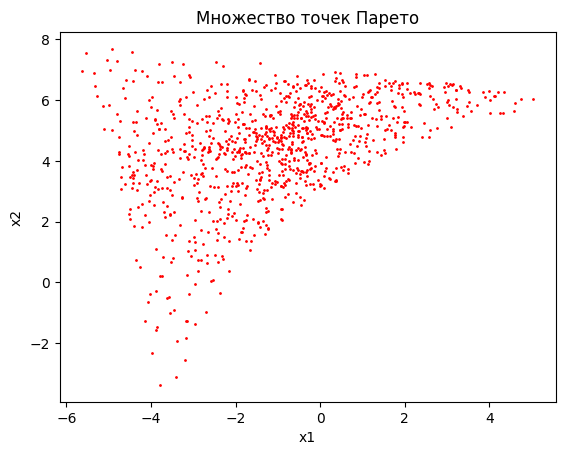

In [66]:
show_pareto_set(pareto, fmt='ro', ms=1)

### Дискриминационный метод

In [48]:
def discriminatory(x, bounds, nums=10):
  pareto_set = []
  b1, b2, b3 = bounds[:]
  for _ in range(nums):
    a1, a2, a3 = generate_alpha()
    F = lambda x: a1*f1(x)+a2*f2(x)+a3*f3(x)
    result = minimize(F, x, constraints=[
        {'type': 'ineq', 'fun': lambda x: f1(x)-b1},
        {'type': 'ineq', 'fun': lambda x: f2(x)-b2},
        {'type': 'ineq', 'fun': lambda x: f3(x)-b3}
    ])
    pareto_set.append(result.x)
  return pareto_set

In [67]:
%%time
pareto = discriminatory((0,0), [200, 62, 180], nums=5000)

CPU times: user 55.7 s, sys: 464 ms, total: 56.2 s
Wall time: 57.5 s


In [68]:
pareto[:10]

[array([-0.41315854, -0.26479037]),
 array([-0.41315854, -0.26479037]),
 array([-0.79715436, -0.4120362 ]),
 array([-0.61896621, -0.34513055]),
 array([-0.41315854, -0.26479037]),
 array([-0.41315854, -0.26479037]),
 array([-0.41315854, -0.26479037]),
 array([-0.79715436, -0.4120362 ]),
 array([-0.79715436, -0.4120362 ]),
 array([-0.41315854, -0.26479037])]

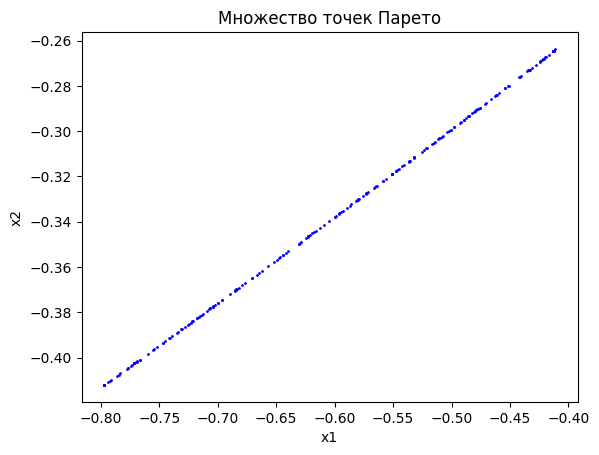

In [69]:
show_pareto_set(pareto, fmt='bo', ms=1.0)

### Метод последовательных уступок

In [20]:
def discounts_method(x0, delta_arr, f_arr):
  pareto_set = []
  constraints = []
  func_set = itertools.permutations(f_arr)
  for f_arr in [f1, f2, f3]:
    f_opt1 = minimize(lambda x, func: func(x), x0, args=(f_arr)).fun
    for delta1 in delta_arr:
      constraints1 = constraints + [{'type': 'ineq', 'fun': lambda x: -1*f1(x) + f_opt1 + delta1}]
      x_opt2 = minimize(f_arr, x0, constraints=constraints1).x
      f_opt2 = f2(x_opt2)
      for delta2 in delta_arr:
        constraints2 = constraints1 + [{'type': 'ineq', 'fun': lambda x: -1*f2(x) + f_opt2 + delta2}]
        pareto_set.append(minimize(f3, x0, constraints=constraints2).x)
  return pareto_set

In [19]:
delta_arr = list(np.arange(0.1, 50.0, 0.5))

In [22]:
%%time
pareto = discounts_method((0,0), delta_arr, [f1,f2,f3])

CPU times: user 2min 26s, sys: 1.34 s, total: 2min 27s
Wall time: 2min 30s


In [23]:
pareto[:10]

[array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477]),
 array([5.78306159, 6.04425477])]

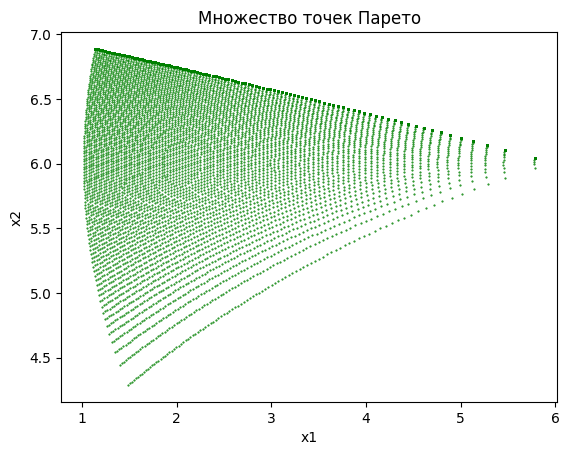

In [50]:
show_pareto_set(pareto, fmt='go', ms=0.5)